### **Projeto Interdisciplinar 2022.2** (IFSP, Campinas) <br/>


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

In [1]:
# add code to run on Colab 
# from google.colab import drive 
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
# pacotes usados neste notebook
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
import numpy as np

<h2>Descrição</h2><hr/>

Este notebook visa realizar a **limpeza e pré-processamento** do conjunto de dados de votação na eleição de 2022 do site do TSE, que será, posteriomente, analisado.


O banco de dados escolhido foi extraido do conjunto de dados do Portal de Dados Abertos do TSE onde sao disponibilizados para a sociedade dados gerados ou custodiados pelo TSE, de forma a garantir o acesso a informacoes e aprimorar a cultura de transparencia.
Este portal substitui o antigo Repositorio de Dados Eleitorais, descontinuado em janeiro de 2022, e esta em constante atualizacao segundo minha observacao.
Segundo o proprio site do TSE, os dados la disponiveis podem ser livremente acessados, utilizados, modificados e compartilhados por qualquer pessoa, com vistas a geracao de novas informacoes e iniciativas da sociedade que busquem estimular o controle social e contribuir com a melhoria da gestao pulica.
(https://dadosabertos.tse.jus.br/)

O portal contem uma enormidade de dados relativos as eleicoes brasileiras como resultados detalhados de votacao das ltimas eleicoes, pesquisas eleitorais, prestacao de contas dos candidatos, perfil de eleitores, assim como dados antigos como candidatos de eleicoes antigas desde o ano de 1933.

Especificamente para este trabalho foram selecionados os seguinte dados referentes ao primeiro turno da eleicao corrente de 2022:

Resultados de votacao por municipio e por zona (830.299KB zip) https://dadosabertos.tse.jus.br/dataset/resultados-2022/resource/40fdcf49-256a-4c81-87cf-711545bd1528 <br>
Perfil dos candidatos (5.986KB zip) https://dadosabertos.tse.jus.br/dataset/candidatos-2022/resource/435145fd-bc9d-446a-ac9d-273f585a0bb9 <br>
Perfil dos eleitores (31.119KB zip) https://dadosabertos.tse.jus.br/dataset/eleitorado-2022/resource/8a6ff7bd-5a22-4d1a-9353-cce06f9f5e35 <br>


A partir dos dados acima foi feito um trabalho de selecao e limpeza de dados para cada um dos arquivos acima:

limitando os dados dentro dos eleitores do municipio de Campinas
convertendo a codificacao de caracteres dos arquivs de dados de "Latin 1" para "UTF-8"
A ideia de limitar os dados aos eleitores de Campinas foi para tentar visualizar o comportamento dos eleitores numa eleicao nacional e estadual, que e diferente de uma eleicao municipal.
Convem registrar que nao foram considerados votacao para presidente, mas sim todos os demais cargos, governador, senador, deputado federal e deputado estadual.

### 1.1 Importando o Dataset

In [ ]:
# oringinal code to run outside Colab
# consulta_cand_2022_BRASIL = pd.read_csv("./datasets TSE/consulta_cand_2022_BRASIL.csv",  encoding = "Latin 1", sep = ';' )

consulta_cand_2022_BRASIL = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/consulta_cand_2022_BRASIL.csv',  encoding = "Latin 1", sep = ';' )

In [ ]:
consulta_cand_2022_BRASIL.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,14/10/2022,13:18:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6004442420226210000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1,14/10/2022,13:18:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6011718020226210000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2,14/10/2022,13:18:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6012168420226210000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,14/10/2022,13:18:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6018051220226090000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
4,14/10/2022,13:18:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6001896720226030000,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,N


In [ ]:
# oringinal code to run outside Colab
#perfil_eleitorado_2022 = pd.read_csv("./datasets TSE/perfil_eleitorado_2022.csv",  encoding = "Latin 1", sep = ';' )
perfil_eleitorado_2022 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/perfil_eleitorado_2022.csv',  encoding = "Latin 1", sep = ';' )

In [ ]:

perfil_eleitorado_2022.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,11/07/2022,22:32:34,2022,PE,24430,IPOJUCA,1,Biométrico,16,4,...,1,SOLTEIRO,4549,45 a 49 anos,2,LÊ E ESCREVE,342,338,1,0
1,11/07/2022,22:32:34,2022,PE,24430,IPOJUCA,1,Biométrico,16,4,...,1,SOLTEIRO,4549,45 a 49 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,753,744,3,0
2,11/07/2022,22:32:34,2022,PE,24430,IPOJUCA,1,Biométrico,16,4,...,1,SOLTEIRO,4549,45 a 49 anos,4,ENSINO FUNDAMENTAL COMPLETO,138,136,0,0
3,11/07/2022,22:32:34,2022,PE,24430,IPOJUCA,1,Biométrico,16,4,...,1,SOLTEIRO,4549,45 a 49 anos,5,ENSINO MÉDIO INCOMPLETO,150,145,1,0
4,11/07/2022,22:32:34,2022,PE,24430,IPOJUCA,1,Biométrico,16,4,...,1,SOLTEIRO,4549,45 a 49 anos,6,ENSINO MÉDIO COMPLETO,558,552,0,0


In [ ]:
# oringinal code to run outside Colab
# bem_candidato_2022_BRASIL = pd.read_csv("./datasets TSE/bem_candidato_2022_BRASIL.csv",  encoding = "Latin 1", sep = ';' )

bem_candidato_2022_BRASIL = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/bem_candidato_2022_BRASIL.csv',  encoding = "Latin 1", sep = ';' )

In [ ]:
bem_candidato_2022_BRASIL.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,14/10/2022,13:18:32,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,BA,BA,BAHIA,50001609463,2,21,"Veículo automotor terrestre: caminhão, automóv...",VEICULO VW/GOL 1.0 2011/2012,"20000,00",10/10/2022,15:35:35
1,14/10/2022,13:18:32,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,RS,RS,RIO GRANDE DO SUL,210001609848,5,99,OUTROS BENS E DIREITOS,XP DISPONIBILIDADE,"11,79",02/10/2022,22:32:39
2,14/10/2022,13:18:32,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,PE,PE,PERNAMBUCO,170001609860,1,45,"Aplicação de renda fixa (CDB, RDB e outros)",DICDB RENDA FIXA SANTAANDER,"9999,98",03/10/2022,01:38:42
3,14/10/2022,13:18:32,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,SP,SP,SÃO PAULO,250001610274,4,32,Quotas ou quinhões de capital,99% DAS QUOTAS DA CLINICA CONSULTORIO DA FAMILIA,"79200,00",14/10/2022,12:47:55
4,14/10/2022,13:18:32,2022,2,Eleição Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,SP,SP,SÃO PAULO,250001610282,7,21,"Veículo automotor terrestre: caminhão, automóv...",01 AUTOMOVEL TOYOTA COROLLA ANO 2015,"97317,96",14/10/2022,12:47:56


In [ ]:
# oringinal code to run outside Colab
# eleitorado_local_votacao_2022 = pd.read_csv("./datasets TSE/eleitorado_local_votacao_2022.csv",  encoding = "Latin 1", sep = ';' )

eleitorado_local_votacao_2022 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/eleitorado_local_votacao_2022.csv',  encoding = "Latin 1", sep = ';' )

In [ ]:
eleitorado_local_votacao_2022.head()

,DT_GERACAO,HH_GERACAO,AA_ELEICAO,DT_ELEICAO,DS_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,...,CD_SITU_ZONA,DS_SITU_ZONA,CD_SITU_SECAO,DS_SITU_SECAO,CD_SITU_LOCALIDADE,DS_SITU_LOCALIDADE,CD_SITU_SECAO_ACESSIBILIDADE,DS_SITU_SECAO_ACESSIBILIDADE,QT_ELEITOR,QT_ELEITOR_ELEICAO
0,14/10/2022,14:08:07,2022,02/10/2022,1º Turno,1,SP,71072,SÃO PAULO,320,...,-1,ATIVO,1,ATIVO,1,ATIVO,0,Sem acessibilidade,387,385
1,14/10/2022,14:08:07,2022,02/10/2022,1º Turno,1,MG,54097,URUCÂNIA,339,...,1,ATIVO,1,ATIVO,1,ATIVO,0,Sem acessibilidade,276,277
2,14/10/2022,14:08:07,2022,30/10/2022,2º Turno,2,MA,7633,CODÓ,7,...,-1,ATIVO,1,ATIVO,1,ATIVO,0,Sem acessibilidade,308,305
3,14/10/2022,14:08:07,2022,30/10/2022,2º Turno,2,RS,85898,CANOAS,66,...,-1,ATIVO,1,ATIVO,1,ATIVO,0,Sem acessibilidade,270,270
4,14/10/2022,14:08:07,2022,02/10/2022,1º Turno,1,ES,57037,VILA VELHA,57,...,-1,ATIVO,1,ATIVO,1,ATIVO,0,Sem acessibilidade,267,267


In [ ]:
# oringinal code to run outside Colab
# votacao_candidato_munzona_2022_BRASIL = pd.read_csv("./datasets TSE/votacao_candidato_munzona_2022_BRASIL.csv",  encoding = "Latin 1", sep = ';' )

votacao_candidato_munzona_2022_BRASIL = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/votacao_candidato_munzona_2022_BRASIL.csv',  encoding = "Latin 1", sep = ';' )

In [ ]:
votacao_candidato_munzona_2022_BRASIL.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,14/10/2022,14:12:54,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,250001682213,PARTIDO ISOLADO,PSB,N,0,Válido,0,5,SUPLENTE
1,14/10/2022,14:12:54,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,250001682213,PARTIDO ISOLADO,PSB,N,0,Válido,0,5,SUPLENTE
2,14/10/2022,14:12:54,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,250001682213,PARTIDO ISOLADO,PSB,N,0,Válido,0,5,SUPLENTE
3,14/10/2022,14:12:54,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,250001682213,PARTIDO ISOLADO,PSB,N,0,Válido,0,5,SUPLENTE
4,14/10/2022,14:12:54,2022,2,Eleição Ordinária,1,546,ELEIÇÕES GERAIS ESTADUAIS 2022,02/10/2022,E,...,#NULO#,250001682213,PARTIDO ISOLADO,PSB,N,3,Válido,3,5,SUPLENTE


### 1.2 Análise exploratória dos dados

In [ ]:
consulta_cand_2022_BRASIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29314 entries, 0 to 29313
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     29314 non-null  object 
 1   HH_GERACAO                     29314 non-null  object 
 2   ANO_ELEICAO                    29314 non-null  int64  
 3   CD_TIPO_ELEICAO                29314 non-null  int64  
 4   NM_TIPO_ELEICAO                29314 non-null  object 
 5   NR_TURNO                       29314 non-null  int64  
 6   CD_ELEICAO                     29314 non-null  int64  
 7   DS_ELEICAO                     29314 non-null  object 
 8   DT_ELEICAO                     29314 non-null  object 
 9   TP_ABRANGENCIA                 29314 non-null  object 
 10  SG_UF                          29314 non-null  object 
 11  SG_UE                          29314 non-null  object 
 12  NM_UE                          29314 non-null 

In [ ]:
consulta_cand_2022_BRASIL.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,...,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_TOT
count,29314.0,29314.0,29314.000000,29314.000000,29314.000000,2.931400e+04,29314.000000,2.931400e+04,29314.000000,29314.000000,...,29314.000000,29314.000000,29314.000000,2.931400e+04,29314.000000,29314.0,2.931400e+04,29314.000000,29314.000000,29314.000000
mean,2022.0,2.0,1.001774,545.999727,6.621853,1.520102e+11,21369.208330,3.593281e+10,11.257624,2.745412,...,3.212015,1.917309,419.175752,2.062308e+06,4.105444,-1.0,6.012829e+18,2.096575,2.143959,2.106502
std,0.0,0.0,0.042081,0.072951,0.802489,7.340172e+10,22202.201761,3.091181e+10,2.475978,2.619094,...,2.478849,1.003347,330.078046,2.280128e+06,1.471515,0.0,8.323999e+15,1.759764,2.004213,1.798269
min,2022.0,2.0,1.000000,544.000000,1.000000,1.000160e+10,10.000000,-4.000000e+00,3.000000,2.000000,...,-4.000000,-4.000000,-4.000000,-4.000000e+00,-1.000000,-1.0,6.001610e+18,-1.000000,-1.000000,-1.000000
25%,2022.0,2.0,1.000000,546.000000,6.000000,9.000165e+10,3511.000000,6.751846e+09,12.000000,2.000000,...,1.000000,1.000000,169.000000,1.270629e+06,4.000000,-1.0,6.006788e+18,2.000000,2.000000,2.000000
50%,2022.0,2.0,1.000000,546.000000,7.000000,1.600016e+11,13113.000000,2.918240e+10,12.000000,2.000000,...,3.000000,2.000000,265.000000,1.270629e+06,5.000000,-1.0,6.010190e+18,2.000000,2.000000,2.000000
75%,2022.0,2.0,1.000000,546.000000,7.000000,2.100016e+11,35352.000000,6.226974e+10,12.000000,2.000000,...,3.000000,3.000000,601.000000,3.176573e+06,5.000000,-1.0,6.016597e+18,2.000000,2.000000,2.000000
max,2022.0,2.0,2.000000,547.000000,10.000000,2.800017e+11,90999.000000,9.999663e+10,12.000000,20.000000,...,9.000000,6.000000,999.000000,8.894403e+07,6.000000,-1.0,6.077856e+18,20.000000,20.000000,20.000000


In [ ]:
perfil_eleitorado_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362480 entries, 0 to 4362479
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [ ]:
bem_candidato_2022_BRASIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92642 entries, 0 to 92641
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DT_GERACAO             92642 non-null  object
 1   HH_GERACAO             92642 non-null  object
 2   ANO_ELEICAO            92642 non-null  int64 
 3   CD_TIPO_ELEICAO        92642 non-null  int64 
 4   NM_TIPO_ELEICAO        92642 non-null  object
 5   CD_ELEICAO             92642 non-null  int64 
 6   DS_ELEICAO             92642 non-null  object
 7   DT_ELEICAO             92642 non-null  object
 8   SG_UF                  92642 non-null  object
 9   SG_UE                  92642 non-null  object
 10  NM_UE                  92642 non-null  object
 11  SQ_CANDIDATO           92642 non-null  int64 
 12  NR_ORDEM_CANDIDATO     92642 non-null  int64 
 13  CD_TIPO_BEM_CANDIDATO  92642 non-null  int64 
 14  DS_TIPO_BEM_CANDIDATO  92642 non-null  object
 15  DS_BEM_CANDIDATO   

In [ ]:
eleitorado_local_votacao_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993712 entries, 0 to 993711
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DT_GERACAO                    993712 non-null  object 
 1   HH_GERACAO                    993712 non-null  object 
 2   AA_ELEICAO                    993712 non-null  int64  
 3   DT_ELEICAO                    993712 non-null  object 
 4   DS_ELEICAO                    993712 non-null  object 
 5   NR_TURNO                      993712 non-null  int64  
 6   SG_UF                         993712 non-null  object 
 7   CD_MUNICIPIO                  993712 non-null  int64  
 8   NM_MUNICIPIO                  993712 non-null  object 
 9   NR_ZONA                       993712 non-null  int64  
 10  NR_SECAO                      993712 non-null  int64  
 11  CD_TIPO_SECAO_AGREGADA        993712 non-null  int64  
 12  DS_TIPO_SECAO_AGREGADA        993712 non-nul

In [ ]:
votacao_candidato_munzona_2022_BRASIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9384917 entries, 0 to 9384916
Data columns (total 44 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DT_GERACAO                 object
 1   HH_GERACAO                 object
 2   ANO_ELEICAO                int64 
 3   CD_TIPO_ELEICAO            int64 
 4   NM_TIPO_ELEICAO            object
 5   NR_TURNO                   int64 
 6   CD_ELEICAO                 int64 
 7   DS_ELEICAO                 object
 8   DT_ELEICAO                 object
 9   TP_ABRANGENCIA             object
 10  SG_UF                      object
 11  SG_UE                      object
 12  NM_UE                      object
 13  CD_MUNICIPIO               int64 
 14  NM_MUNICIPIO               object
 15  NR_ZONA                    int64 
 16  CD_CARGO                   int64 
 17  DS_CARGO                   object
 18  SQ_CANDIDATO               int64 
 19  NR_CANDIDATO               int64 
 20  NM_CANDIDATO            

<h2>2. Limpeza e Pré-processamento de Dados</h2>
<hr/>

In [ ]:
#A primeira coisa a ser feita é limpar os caracteres especiais que vem nos dados da prefeitura.
#Essa função limpa esses códigos e coloca caracteres legíveis no lugar.

def limpaCaracteresEspeciais(df):
    replace_dict = {'Ç':'C','Ã':'A','Õ':'O',
                    'Á':'A','É':'E','Í':'I','Ó':'O','Ú':'U',
                    'Â':'A','Ê':'E','Ô':'O',
                    'ç':'c','ã':'a','õ':'o',
                    'á':'a','é':'e','í':'i','ó':'o','ú':'u',
                    'â':'a','ê':'e','ô':'o',
                    'à':'a',
                    ',':'.'}
    df.replace(to_replace=replace_dict, regex=True, inplace=True)

#### 2.1 consulta_cand_2022_BRASIL

In [ ]:
df = consulta_cand_2022_BRASIL.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29314 entries, 0 to 29313
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     29314 non-null  object 
 1   HH_GERACAO                     29314 non-null  object 
 2   ANO_ELEICAO                    29314 non-null  int64  
 3   CD_TIPO_ELEICAO                29314 non-null  int64  
 4   NM_TIPO_ELEICAO                29314 non-null  object 
 5   NR_TURNO                       29314 non-null  int64  
 6   CD_ELEICAO                     29314 non-null  int64  
 7   DS_ELEICAO                     29314 non-null  object 
 8   DT_ELEICAO                     29314 non-null  object 
 9   TP_ABRANGENCIA                 29314 non-null  object 
 10  SG_UF                          29314 non-null  object 
 11  SG_UE                          29314 non-null  object 
 12  NM_UE                          29314 non-null 

In [ ]:
## removendo colunas desncessárias para esta análise
df1=df.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','NR_TURNO','CD_ELEICAO','DT_ELEICAO','TP_ABRANGENCIA','NM_UE','SG_UF','NM_CANDIDATO','NM_PARTIDO','NM_COLIGACAO','SQ_COLIGACAO','NM_SOCIAL_CANDIDATO','CD_SITUACAO_CANDIDATURA','DS_SITUACAO_CANDIDATURA','CD_DETALHE_SITUACAO_CAND','DS_DETALHE_SITUACAO_CAND','DS_COMPOSICAO_COLIGACAO','CD_SIT_TOT_TURNO','DS_ELEICAO','CD_MUNICIPIO_NASCIMENTO','NR_CPF_CANDIDATO','NM_EMAIL','TP_AGREMIACAO','NR_FEDERACAO','NM_FEDERACAO','SG_FEDERACAO','DS_COMPOSICAO_FEDERACAO','NM_COLIGACAO','CD_NACIONALIDADE','DS_NACIONALIDADE','NR_TITULO_ELEITORAL_CANDIDATO','VR_DESPESA_MAX_CAMPANHA','DS_SIT_TOT_TURNO','NR_PROTOCOLO_CANDIDATURA','NR_PROCESSO','CD_SITUACAO_CANDIDATO_PLEITO','DS_SITUACAO_CANDIDATO_PLEITO','ST_DECLARAR_BENS','CD_SITUACAO_CANDIDATO_URNA','DS_SITUACAO_CANDIDATO_URNA','ST_CANDIDATO_INSERIDO_URNA','NM_TIPO_DESTINACAO_VOTOS','CD_SITUACAO_CANDIDATO_TOT','ST_PREST_CONTAS','DS_SITUACAO_CANDIDATO_TOT'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29314 entries, 0 to 29313
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SG_UE                    29314 non-null  object 
 1   CD_CARGO                 29314 non-null  int64  
 2   DS_CARGO                 29314 non-null  object 
 3   SQ_CANDIDATO             29314 non-null  int64  
 4   NR_CANDIDATO             29314 non-null  int64  
 5   NM_URNA_CANDIDATO        29314 non-null  object 
 6   NR_PARTIDO               29314 non-null  int64  
 7   SG_PARTIDO               29314 non-null  object 
 8   SG_UF_NASCIMENTO         29314 non-null  object 
 9   NM_MUNICIPIO_NASCIMENTO  29314 non-null  object 
 10  DT_NASCIMENTO            29289 non-null  object 
 11  NR_IDADE_DATA_POSSE      29289 non-null  float64
 12  CD_GENERO                29314 non-null  int64  
 13  DS_GENERO                29314 non-null  object 
 14  CD_GRAU_INSTRUCAO     

In [ ]:
df1.head()

,SG_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,...,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,ST_REELEICAO
0,RS,6,DEPUTADO FEDERAL,210001596986,4010,MALU LOOSE,40,PSB,RS,SANTA MARIA,...,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,N
1,RS,6,DEPUTADO FEDERAL,210001620062,4599,PEDRO MACARI,45,PSDB,RS,LAGOA VERMELHA,...,MASCULINO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,169,COMERCIANTE,N
2,RS,7,DEPUTADO ESTADUAL,210001620186,23123,ROGERIO GOMES,23,CIDADANIA,RS,RIO GRANDE,...,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,131,ADVOGADO,N
3,GO,7,DEPUTADO ESTADUAL,90001712199,11500,OZAIR JOSE,11,PP,GO,CERES,...,MASCULINO,7,SUPERIOR INCOMPLETO,3,CASADO(A),1,BRANCA,257,EMPRESÁRIO,N
4,AP,6,DEPUTADO FEDERAL,30001595543,1099,LIMA JUNIOR,10,REPUBLICANOS,PA,BREVES,...,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,166,LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E ...,N


In [ ]:
#Isso converterá os caracteres especiais em caracteres legíveis para todos os dataframes
print(30 * '-')
print('Limpando os caracteres especiais')
limpaCaracteresEspeciais(df1)
print(30 * '-')
print('OK')

------------------------------
Limpando os caracteres especiais
------------------------------
OK


In [ ]:
df1.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/consulta_cand_2022_BRASIL_pre.csv',  index=False)

#### 2.2 bem_candidato_2022_BRASIL

In [ ]:
df = bem_candidato_2022_BRASIL.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92642 entries, 0 to 92641
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DT_GERACAO             92642 non-null  object
 1   HH_GERACAO             92642 non-null  object
 2   ANO_ELEICAO            92642 non-null  int64 
 3   CD_TIPO_ELEICAO        92642 non-null  int64 
 4   NM_TIPO_ELEICAO        92642 non-null  object
 5   CD_ELEICAO             92642 non-null  int64 
 6   DS_ELEICAO             92642 non-null  object
 7   DT_ELEICAO             92642 non-null  object
 8   SG_UF                  92642 non-null  object
 9   SG_UE                  92642 non-null  object
 10  NM_UE                  92642 non-null  object
 11  SQ_CANDIDATO           92642 non-null  int64 
 12  NR_ORDEM_CANDIDATO     92642 non-null  int64 
 13  CD_TIPO_BEM_CANDIDATO  92642 non-null  int64 
 14  DS_TIPO_BEM_CANDIDATO  92642 non-null  object
 15  DS_BEM_CANDIDATO   

In [ ]:
## removendo colunas desncessárias para esta análise
df2=df.drop(columns=['DT_GERACAO','HH_GERACAO','DS_ELEICAO','CD_ELEICAO','DT_ELEICAO','ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','CD_ELEICAO','NR_ORDEM_CANDIDATO','SG_UF','NM_UE','DT_ULTIMA_ATUALIZACAO','HH_ULTIMA_ATUALIZACAO'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92642 entries, 0 to 92641
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SG_UE                  92642 non-null  object
 1   SQ_CANDIDATO           92642 non-null  int64 
 2   CD_TIPO_BEM_CANDIDATO  92642 non-null  int64 
 3   DS_TIPO_BEM_CANDIDATO  92642 non-null  object
 4   DS_BEM_CANDIDATO       92642 non-null  object
 5   VR_BEM_CANDIDATO       92642 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.2+ MB


In [ ]:
df2.head()

,SG_UE,SQ_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,BA,50001609463,21,"Veículo automotor terrestre: caminhão, automóv...",VEICULO VW/GOL 1.0 2011/2012,"20000,00"
1,RS,210001609848,99,OUTROS BENS E DIREITOS,XP DISPONIBILIDADE,"11,79"
2,PE,170001609860,45,"Aplicação de renda fixa (CDB, RDB e outros)",DICDB RENDA FIXA SANTAANDER,"9999,98"
3,SP,250001610274,32,Quotas ou quinhões de capital,99% DAS QUOTAS DA CLINICA CONSULTORIO DA FAMILIA,"79200,00"
4,SP,250001610282,21,"Veículo automotor terrestre: caminhão, automóv...",01 AUTOMOVEL TOYOTA COROLLA ANO 2015,"97317,96"


In [ ]:
#Isso converterá os caracteres especiais em caracteres legíveis para todos os dataframes
print(30 * '-')
print('Limpando os caracteres especiais')
limpaCaracteresEspeciais(df2)
print(30 * '-')
print('OK')

------------------------------
Limpando os caracteres especiais
------------------------------
OK


In [ ]:
df2.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/bem_candidato_2022_BRASIL_pre.csv',  index=False)

#### 2.3 perfil_eleitorado_2022

In [ ]:
df = perfil_eleitorado_2022.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362480 entries, 0 to 4362479
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

In [ ]:
## removendo colunas desncessárias para esta análise
df3=df.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO','SG_UF','CD_MUN_SIT_BIOMETRICA','DS_MUN_SIT_BIOMETRICA','QT_ELEITORES_BIOMETRIA','QT_ELEITORES_DEFICIENCIA','QT_ELEITORES_INC_NM_SOCIAL'])

In [ ]:
df3.head()

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL
0,24430,IPOJUCA,16,4,FEMININO,1,SOLTEIRO,4549,45 a 49 anos,2,LÊ E ESCREVE,342
1,24430,IPOJUCA,16,4,FEMININO,1,SOLTEIRO,4549,45 a 49 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,753
2,24430,IPOJUCA,16,4,FEMININO,1,SOLTEIRO,4549,45 a 49 anos,4,ENSINO FUNDAMENTAL COMPLETO,138
3,24430,IPOJUCA,16,4,FEMININO,1,SOLTEIRO,4549,45 a 49 anos,5,ENSINO MÉDIO INCOMPLETO,150
4,24430,IPOJUCA,16,4,FEMININO,1,SOLTEIRO,4549,45 a 49 anos,6,ENSINO MÉDIO COMPLETO,558


In [ ]:
#Isso converterá os caracteres especiais em caracteres legíveis para todos os dataframes
print(30 * '-')
print('Limpando os caracteres especiais')
limpaCaracteresEspeciais(df3)
print(30 * '-')
print('OK')

------------------------------
Limpando os caracteres especiais
------------------------------
OK


In [ ]:
df3.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/perfil_eleitorado_2022_pre.csv',  index=False)

#### 2.4 eleitorado_local_votacao_2022

In [ ]:
df = eleitorado_local_votacao_2022.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993712 entries, 0 to 993711
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   DT_GERACAO                    993712 non-null  object 
 1   HH_GERACAO                    993712 non-null  object 
 2   AA_ELEICAO                    993712 non-null  int64  
 3   DT_ELEICAO                    993712 non-null  object 
 4   DS_ELEICAO                    993712 non-null  object 
 5   NR_TURNO                      993712 non-null  int64  
 6   SG_UF                         993712 non-null  object 
 7   CD_MUNICIPIO                  993712 non-null  int64  
 8   NM_MUNICIPIO                  993712 non-null  object 
 9   NR_ZONA                       993712 non-null  int64  
 10  NR_SECAO                      993712 non-null  int64  
 11  CD_TIPO_SECAO_AGREGADA        993712 non-null  int64  
 12  DS_TIPO_SECAO_AGREGADA        993712 non-nul

In [ ]:
## removendo colunas desncessárias para esta análise
df4=df.drop(columns=['DT_GERACAO','HH_GERACAO','AA_ELEICAO','DT_ELEICAO','DS_ELEICAO','NR_TURNO','CD_TIPO_SECAO_AGREGADA','DS_TIPO_SECAO_AGREGADA','CD_TIPO_LOCAL','DS_TIPO_LOCAL','DS_ENDERECO','CD_SITU_SECAO','DS_SITU_SECAO','NM_BAIRRO','NR_CEP','NR_TELEFONE_LOCAL','CD_SITU_LOCAL_VOTACAO','DS_SITU_LOCAL_VOTACAO','CD_SITU_ZONA','DS_SITU_ZONA','CD_SITU_LOCALIDADE','DS_SITU_LOCALIDADE','CD_SITU_SECAO_ACESSIBILIDADE','DS_SITU_SECAO_ACESSIBILIDADE','QT_ELEITOR_ELEICAO'])

In [ ]:
df4.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,NM_LOCAL_VOTACAO,NR_LATITUDE,NR_LONGITUDE,QT_ELEITOR
0,SP,71072,SÃO PAULO,320,197,1139,EE. JOÃO AMOS COMENIUS,-1.000000,-1.000000,387
1,MG,54097,URUCÂNIA,339,56,1015,ESCOLA MUNICIPAL MANOEL MAYRINK NETO,-1.000000,-1.000000,276
2,MA,7633,CODÓ,7,46,1082,COLÉGIO ANANIAS MURAD,-4.454281,-43.892574,308
3,RS,85898,CANOAS,66,312,1074,ESCOLA ESTADUAL DE ENSINO MÉDIO GUILHERME DE A...,-29.913171,-51.209072,270
4,ES,57037,VILA VELHA,57,71,1090,UMEF MARIA ELEONORA D'AZEVEDO PEREIRA,-1.000000,-1.000000,267


In [ ]:
#Isso converterá os caracteres especiais em caracteres legíveis para todos os dataframes
print(30 * '-')
print('Limpando os caracteres especiais')
limpaCaracteresEspeciais(df4)
print(30 * '-')
print('OK')

------------------------------
Limpando os caracteres especiais
------------------------------
OK


In [ ]:
df4.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/eleitorado_local_votacao_2022_pre.csv',  index=False)

#### 2.4 votacao_candidato_munzona_2022_BRASIL

In [ ]:
df = votacao_candidato_munzona_2022_BRASIL.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9384917 entries, 0 to 9384916
Data columns (total 44 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DT_GERACAO                 object
 1   HH_GERACAO                 object
 2   ANO_ELEICAO                int64 
 3   CD_TIPO_ELEICAO            int64 
 4   NM_TIPO_ELEICAO            object
 5   NR_TURNO                   int64 
 6   CD_ELEICAO                 int64 
 7   DS_ELEICAO                 object
 8   DT_ELEICAO                 object
 9   TP_ABRANGENCIA             object
 10  SG_UF                      object
 11  SG_UE                      object
 12  NM_UE                      object
 13  CD_MUNICIPIO               int64 
 14  NM_MUNICIPIO               object
 15  NR_ZONA                    int64 
 16  CD_CARGO                   int64 
 17  DS_CARGO                   object
 18  SQ_CANDIDATO               int64 
 19  NR_CANDIDATO               int64 
 20  NM_CANDIDATO            

In [ ]:
## removendo colunas desncessárias para esta análise
df5=df.drop(columns=['DT_GERACAO','HH_GERACAO','ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','NR_TURNO','CD_ELEICAO','DS_ELEICAO','DT_ELEICAO','TP_ABRANGENCIA','SG_UF','NM_UE','NM_CANDIDATO','NM_SOCIAL_CANDIDATO','CD_SITUACAO_CANDIDATURA','DS_SITUACAO_CANDIDATURA','CD_DETALHE_SITUACAO_CAND','DS_DETALHE_SITUACAO_CAND','TP_AGREMIACAO','NM_PARTIDO','NR_FEDERACAO','NM_FEDERACAO','SG_FEDERACAO','DS_COMPOSICAO_FEDERACAO','SQ_COLIGACAO','NM_COLIGACAO','DS_COMPOSICAO_COLIGACAO','ST_VOTO_EM_TRANSITO','NM_TIPO_DESTINACAO_VOTOS','QT_VOTOS_NOMINAIS_VALIDOS','CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO'])

In [ ]:
df5.head()

,SG_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS
0,SP,69612,RIBEIRÃO BRANCO,53,6,Deputado Federal,250001620268,4080,DOUTOR UBIALI,40,PSB,0
1,SP,62316,BIRITIBA MIRIM,319,6,Deputado Federal,250001620268,4080,DOUTOR UBIALI,40,PSB,0
2,SP,64432,GLICÉRIO,289,6,Deputado Federal,250001620268,4080,DOUTOR UBIALI,40,PSB,0
3,SP,66893,MAUÁ,339,6,Deputado Federal,250001620268,4080,DOUTOR UBIALI,40,PSB,0
4,SP,62499,BOTUCATU,26,6,Deputado Federal,250001620268,4080,DOUTOR UBIALI,40,PSB,3


In [ ]:
#Isso converterá os caracteres especiais em caracteres legíveis para todos os dataframes
print(30 * '-')
print('Limpando os caracteres especiais')
limpaCaracteresEspeciais(df5)
print(30 * '-')
print('OK')

------------------------------
Limpando os caracteres especiais
------------------------------
OK


In [ ]:
df5.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/votacao_candidato_munzona_2022_BRASIL_pre.csv', index=False)

### 3. Merge DataFrames


In [ ]:
df1 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/consulta_cand_2022_BRASIL_pre.csv' )

In [ ]:
df2 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/bem_candidato_2022_BRASIL_pre.csv' )

In [2]:
# para rodar no Google Colab
# df5 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/votacao_candidato_munzona_2022_BRASIL_pre.csv' )

# para rodar no computador
df5 = pd.read_csv("./datasets TSE/votacao_candidato_munzona_2022_BRASIL_pre.csv" )

In [ ]:
df1.head(3)

,SG_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,...,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,ST_REELEICAO
0,RS,6,DEPUTADO FEDERAL,210001596986,4010,MALU LOOSE,40,PSB,RS,SANTA MARIA,...,FEMININO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,N
1,RS,6,DEPUTADO FEDERAL,210001620062,4599,PEDRO MACARI,45,PSDB,RS,LAGOA VERMELHA,...,MASCULINO,6,ENSINO MEDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,169,COMERCIANTE,N
2,RS,7,DEPUTADO ESTADUAL,210001620186,23123,ROGERIO GOMES,23,CIDADANIA,RS,RIO GRANDE,...,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,131,ADVOGADO,N


In [ ]:
df2.head(3)

,SG_UE,SQ_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,BA,50001609463,21,Veiculo automotor terrestre: caminhao. automov...,VEICULO VW/GOL 1.0 2011/2012,20000.00
1,RS,210001609848,99,OUTROS BENS E DIREITOS,XP DISPONIBILIDADE,11.79
2,PE,170001609860,45,Aplicacao de renda fixa (CDB. RDB e outros),DICDB RENDA FIXA SANTAANDER,9999.98


In [ ]:
m1 = pd.merge(df1, df2, how='inner', on = 'SQ_CANDIDATO')

In [ ]:
m1.head(3)

,SG_UE_x,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,...,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,ST_REELEICAO,SG_UE_y,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,RS,6,DEPUTADO FEDERAL,210001596986,4010,MALU LOOSE,40,PSB,RS,SANTA MARIA,...,1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,N,RS,11,Apartamento,APARTAMENTO EM SANTA MARIA,160000.0
1,RS,6,DEPUTADO FEDERAL,210001596986,4010,MALU LOOSE,40,PSB,RS,SANTA MARIA,...,1,BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,N,RS,21,Veiculo automotor terrestre: caminhao. automov...,FORD FIESTA 2013,39000.0
2,RS,6,DEPUTADO FEDERAL,210001620062,4599,PEDRO MACARI,45,PSDB,RS,LAGOA VERMELHA,...,1,BRANCA,169,COMERCIANTE,N,RS,99,OUTROS BENS E DIREITOS,Disponivel,10000.0


In [ ]:
m1.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/candidatos_2022_BRASIL_pre_merge1.csv', index=False)

In [ ]:
m1 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/candidatos_2022_BRASIL_pre_merge1.csv' )

In [ ]:
## removendo colunas desncessárias para esta análise
m1_1=m1.drop(columns=['SG_UE_x','CD_CARGO','DS_CARGO','NR_CANDIDATO','NM_URNA_CANDIDATO','NR_PARTIDO','SG_PARTIDO','SG_UE_y','CD_TIPO_BEM_CANDIDATO','DS_TIPO_BEM_CANDIDATO'])

In [ ]:
m1_1.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/candidatos_2022_BRASIL_pre_merge2.csv',  index=False)

In [3]:
# para rodar no Google Colab
# m1_1 = pd.read_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/candidatos_2022_BRASIL_pre_merge2.csv' )

# para rodar no computador
m1_1 = pd.read_csv("./datasets TSE/candidatos_2022_BRASIL_pre_merge2.csv" )

In [ ]:
m2 = pd.merge(m1_1, df5, how='inner', on = 'SQ_CANDIDATO')

In [ ]:
m2.to_csv('gdrive/My Drive/IFSP-CMP-D2APR-2022.2/ProjInter_20022.2/datasets TSE/votacao_candidato_munzona_2022_BRASIL_pre_merge1.csv', index=False)

In [2]:
m2 = pd.read_csv("./datasets TSE/votacao_candidato_munzona_2022_BRASIL_pre_merge2.csv" )
m2.head()

MemoryError: Unable to allocate 3.50 GiB for an array with shape (14, 33554691) and data type object

### 2.1 NM_URNA_CANDIDATO
Vamos checar se há ruídos nesta coluna, ou seja, se há uma categoria com nomes muito estranhos.

In [ ]:
df1['NM_URNA_CANDIDATO'].unique()

array(['ROGERIO LIMA', 'PEDRO TONETTI', 'CRIS GOUVÊA ', ...,
       'TAMARA CREMA', 'RODRIGÃO', 'SILVANA BARONE'], dtype=object)

Parece ok

### 2.1 NM_MUNICIPIO
Vamos checar se há ruídos em outras colunas, ou seja, se há valores muito estranhos.

In [ ]:
df1['NM_MUNICIPIO'].unique()

array(['JUQUIÁ', 'GASTÃO VIDIGAL', 'CAJOBI', 'PARAÍSO', 'IBIRÁ', 'OSASCO',
       'TAQUARITINGA', 'COTIA', 'SÃO JOSÉ DO RIO PRETO',
       'CACHOEIRA PAULISTA', 'BERTIOGA', 'ROSEIRA', 'JARDINÓPOLIS',
       'BILAC', 'MARÍLIA', 'CERQUEIRA CÉSAR', 'SÃO PAULO',
       'BARÃO DE ANTONINA', 'ÁGUAS DA PRATA', 'SÃO ROQUE', 'BOITUVA',
       'BAURU', 'ITUPEVA', 'SOROCABA', 'PORANGABA', 'NOVA CASTILHO',
       'QUEIROZ', 'SEBASTIANÓPOLIS DO SUL', 'LORENA', 'CAMPINAS',
       'SÃO JOAQUIM DA BARRA', 'MACATUBA', 'PEREIRA BARRETO', 'DIADEMA',
       'SÃO JOÃO DO PAU D ALHO', 'REGENTE FEIJÓ', 'SÃO JOSÉ DOS CAMPOS',
       'TAUBATÉ', 'NAZARÉ PAULISTA', 'QUINTANA', 'ORLÂNDIA', 'GUARARAPES',
       'SANTA BÁRBARA D OESTE', 'MATÃO', 'FERNANDÓPOLIS', 'JUMIRIM',
       'MINEIROS DO TIETÊ', 'ITAPURA', 'VIRADOURO', 'CESÁRIO LANGE',
       'OCAUÇU', 'BORÁ', 'ITABERÁ', 'SÃO JOÃO DAS DUAS PONTES',
       'REGISTRO', 'CRUZEIRO', 'CAFELÂNDIA', 'RIBEIRÃO PIRES',
       'SANTA MARIA DA SERRA', 'PEDERNEIRAS', 'JÚL

In [ ]:
### Separando dataset para a cidade de Campinas apenas
df_Cps = df1.query('NM_MUNICIPIO == "CAMPINAS"')

In [ ]:
df_Cps.head(3)

,DS_ELEICAO,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
30,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,275,Deputado Estadual,CELSINHO TATÉ,Partido isolado,PROS,Partido Republicano da Ordem Social,PARTIDO ISOLADO,SUPLENTE,0
79,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,33,Deputado Federal,ELIAS AGOSTINHO,Partido isolado,PROS,Partido Republicano da Ordem Social,PARTIDO ISOLADO,NÃO ELEITO,12
401,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,379,Deputado Estadual,CINTIA MATOS,Partido isolado,PDT,Partido Democrático Trabalhista,PARTIDO ISOLADO,SUPLENTE,2


In [ ]:
df_Cps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24297 entries, 30 to 2706868
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DS_ELEICAO         24297 non-null  object
 1   SG_UF              24297 non-null  object
 2   NM_MUNICIPIO       24297 non-null  object
 3   NR_ZONA            24297 non-null  int64 
 4   DS_CARGO           24297 non-null  object
 5   NM_URNA_CANDIDATO  24297 non-null  object
 6   TP_AGREMIACAO      24297 non-null  object
 7   SG_PARTIDO         24297 non-null  object
 8   NM_PARTIDO         24297 non-null  object
 9   NM_COLIGACAO       24297 non-null  object
 10  DS_SIT_TOT_TURNO   24297 non-null  object
 11  QT_VOTOS_NOMINAIS  24297 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


In [ ]:
df_Cps['NM_URNA_CANDIDATO'].unique()

array(['CELSINHO TATÉ', 'ELIAS AGOSTINHO', 'CINTIA MATOS', ...,
       'ANA PAULA LOURENÇO', 'MOYSES GABRIEL ', 'SARA VIEIRA'],
      dtype=object)

In [ ]:
df_Cps.query('NM_URNA_CANDIDATO == "KIM KATAGUIRI"')

,DS_ELEICAO,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
621874,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,275,Deputado Federal,KIM KATAGUIRI,Coligação,DEM,Democratas,PSDB-PSD-DEM-PP,ELEITO POR QP,3044
624833,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,379,Deputado Federal,KIM KATAGUIRI,Coligação,DEM,Democratas,PSDB-PSD-DEM-PP,ELEITO POR QP,2287
762910,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,380,Deputado Federal,KIM KATAGUIRI,Coligação,DEM,Democratas,PSDB-PSD-DEM-PP,ELEITO POR QP,2268
1494518,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,274,Deputado Federal,KIM KATAGUIRI,Coligação,DEM,Democratas,PSDB-PSD-DEM-PP,ELEITO POR QP,1907
2232767,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,33,Deputado Federal,KIM KATAGUIRI,Coligação,DEM,Democratas,PSDB-PSD-DEM-PP,ELEITO POR QP,1184
2328186,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Deputado Federal,KIM KATAGUIRI,Coligação,DEM,Democratas,PSDB-PSD-DEM-PP,ELEITO POR QP,1801
2364835,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,378,Deputado Federal,KIM KATAGUIRI,Coligação,DEM,Democratas,PSDB-PSD-DEM-PP,ELEITO POR QP,2557


### 2.2 QT_VOTOS_NOMINAIS
Esse atributo tem o tipo de dado certo. Vamos checar se ele tem _outliers_.

<AxesSubplot:xlabel='QT_VOTOS_NOMINAIS'>

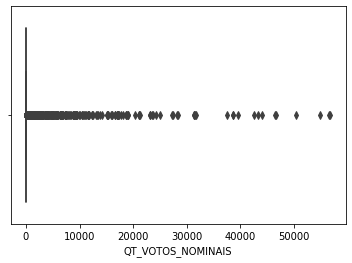

In [ ]:
sns.boxplot(x='QT_VOTOS_NOMINAIS', data=df_Cps)

Boxplot indica vários _'outliers'_, estranho, vamos analisar melhor adiante

In [ ]:
print(f"Quantidade de registros com 'QT_VOTOS_NOMINAIS' NaN: {df_Cps['QT_VOTOS_NOMINAIS'].isnull().sum()} ({(df_Cps['QT_VOTOS_NOMINAIS'].isnull().sum() * 100) / df.shape[0]:.2f}%)")

Quantidade de registros com 'QT_VOTOS_NOMINAIS' NaN: 0 (0.00%)


Não há valores NaN para 'QT_VOTOS_NOMINAIS'

### 2.4 NR_ZONA 

In [ ]:
df_Cps['NR_ZONA'].unique()

array([275,  33, 379, 423, 378, 380, 274], dtype=int64)

Parece ok

##### **Análise dos Outliers**

<AxesSubplot:xlabel='QT_VOTOS_NOMINAIS'>

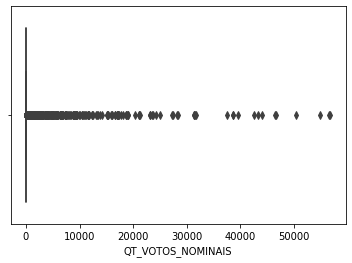

In [ ]:
sns.boxplot(x='QT_VOTOS_NOMINAIS', data=df_Cps)

In [ ]:
df_Cps.query('QT_VOTOS_NOMINAIS >= 10000')

,DS_ELEICAO,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
41969,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,33,Deputado Estadual,JANAINA PASCHOAL,Partido isolado,PSL,Partido Social Liberal,PARTIDO ISOLADO,ELEITO POR QP,11251
111327,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,380,Governador,PAULO SKAF,Partido isolado,MDB,Movimento Democrático Brasileiro,PARTIDO ISOLADO,NÃO ELEITO,15359
150153,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,380,Deputado Estadual,JANAINA PASCHOAL,Partido isolado,PSL,Partido Social Liberal,PARTIDO ISOLADO,ELEITO POR QP,14108
164963,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,274,Senador,MARA GABRILLI,Coligação,PSDB,Partido da Social Democracia Brasileira,ACELERASP,ELEITO,15934
166414,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Governador,JOÃO DORIA,Coligação,PSDB,Partido da Social Democracia Brasileira,ACELERASP,2º TURNO,21263
...,...,...,...,...,...,...,...,...,...,...,...,...
2247170,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,379,Deputado Estadual,JANAINA PASCHOAL,Partido isolado,PSL,Partido Social Liberal,PARTIDO ISOLADO,ELEITO POR QP,12294
2465662,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,378,Governador,PAULO SKAF,Partido isolado,MDB,Movimento Democrático Brasileiro,PARTIDO ISOLADO,NÃO ELEITO,18823
2466050,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,275,Governador,PAULO SKAF,Partido isolado,MDB,Movimento Democrático Brasileiro,PARTIDO ISOLADO,NÃO ELEITO,16546
2575676,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,380,Deputado Federal,EDUARDO BOLSONARO,Partido isolado,PSL,Partido Social Liberal,PARTIDO ISOLADO,ELEITO POR QP,10441


Outliers são os mais bem votados. 
Não removeremos ouliers

### 2.5 Separando dataset por cargos

In [ ]:
df_Cps['DS_CARGO'].unique()

array(['Deputado Estadual', 'Deputado Federal', 'Senador', 'Governador'],
      dtype=object)

In [ ]:
### Separando dataset para votos de eleitores de Campinas para Governador 
df_Cps_Governador = df_Cps.query('DS_CARGO == "Governador"')
df_Cps_Governador.head()

,DS_ELEICAO,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
22566,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,379,Governador,TONINHO FERREIRA,Partido isolado,PSTU,Partido Socialista dos Trabalhadores Unificado,PARTIDO ISOLADO,NÃO ELEITO,97
23355,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Governador,PROFESSORA LISETE,Coligação,PSOL,Partido Socialismo e Liberdade,SEM MEDO DE MUDAR SÃO PAULO,NÃO ELEITO,2342
26212,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,378,Governador,TONINHO FERREIRA,Partido isolado,PSTU,Partido Socialista dos Trabalhadores Unificado,PARTIDO ISOLADO,NÃO ELEITO,109
59470,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,274,Governador,TONINHO FERREIRA,Partido isolado,PSTU,Partido Socialista dos Trabalhadores Unificado,PARTIDO ISOLADO,NÃO ELEITO,52
67708,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,380,Governador,PROF. CLAUDIO FERNANDO,Coligação,PMN,Partido da Mobilização Nacional,COLIGAÇÃO MOBILIZAÇÃO SUSTENTÁVEL POR SÃO PAULO,NÃO ELEITO,102


In [ ]:
### Separando dataset para votos de eleitores de Campinas para Deputado Federal
df_Cps_DeputadoFederal = df_Cps.query('DS_CARGO == "Deputado Federal"')
df_Cps_DeputadoFederal.head()

,DS_ELEICAO,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
79,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,33,Deputado Federal,ELIAS AGOSTINHO,Partido isolado,PROS,Partido Republicano da Ordem Social,PARTIDO ISOLADO,NÃO ELEITO,12
844,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,378,Deputado Federal,VERA LUCIA DOS SANTOS,Partido isolado,PDT,Partido Democrático Trabalhista,PARTIDO ISOLADO,SUPLENTE,8
1042,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,379,Deputado Federal,RODRIGO ROSARIO,Partido isolado,PROS,Partido Republicano da Ordem Social,PARTIDO ISOLADO,NÃO ELEITO,1
1214,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,274,Deputado Federal,MARIA DE SIMONI,Coligação,PT,Partido dos Trabalhadores,SÃO PAULO DO TRABALHO E DE OPORTUNIDADES,SUPLENTE,0
1691,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Deputado Federal,ALZIRA BOMBONATO,Coligação,PSOL,Partido Socialismo e Liberdade,SEM MEDO DE MUDAR SÃO PAULO,SUPLENTE,11


In [ ]:
### Separando dataset para votos de eleitores de Campinas para Deputado Estadual
df_Cps_DeputadoEstadual = df_Cps.query('DS_CARGO == "Deputado Estadual"')
df_Cps_DeputadoEstadual.head()

,DS_ELEICAO,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
30,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,275,Deputado Estadual,CELSINHO TATÉ,Partido isolado,PROS,Partido Republicano da Ordem Social,PARTIDO ISOLADO,SUPLENTE,0
401,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,379,Deputado Estadual,CINTIA MATOS,Partido isolado,PDT,Partido Democrático Trabalhista,PARTIDO ISOLADO,SUPLENTE,2
704,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Deputado Estadual,PROFESSORA FATIMA,Coligação,PSB,Partido Socialista Brasileiro,"COLIGAÇÃO PSB, PTB, PV, PSC, PPS",SUPLENTE,0
948,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,380,Deputado Estadual,MARLEIDE SOARES,Partido isolado,PT,Partido dos Trabalhadores,PARTIDO ISOLADO,SUPLENTE,0
1325,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Deputado Estadual,PROFA LU LOPES,Partido isolado,PROS,Partido Republicano da Ordem Social,PARTIDO ISOLADO,SUPLENTE,0


In [ ]:
### Separando dataset para votos de eleitores de Campinas para Senador
df_Cps_Senador = df_Cps.query('DS_CARGO == "Senador"')
df_Cps_Senador.head()

,DS_ELEICAO,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
2959,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,378,Senador,EDUCADOR DANIEL CARA,Coligação,PSOL,Partido Socialismo e Liberdade,SEM MEDO DE MUDAR SÃO PAULO,NÃO ELEITO,1920
2971,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,274,Senador,EDUCADOR DANIEL CARA,Coligação,PSOL,Partido Socialismo e Liberdade,SEM MEDO DE MUDAR SÃO PAULO,NÃO ELEITO,1878
20387,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Senador,MAURREN MAGGI,Coligação,PSB,Partido Socialista Brasileiro,SÃO PAULO CONFIA E AVANÇA,NÃO ELEITO,7406
21868,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,379,Senador,DRA. ELIANA FERREIRA,Partido isolado,PSTU,Partido Socialista dos Trabalhadores Unificado,PARTIDO ISOLADO,NÃO ELEITO,271
59476,ELEIÇÕES GERAIS ESTADUAIS 2018,SP,CAMPINAS,423,Senador,MANCHA,Partido isolado,PSTU,Partido Socialista dos Trabalhadores Unificado,PARTIDO ISOLADO,NÃO ELEITO,35


In [ ]:
df_Cps_somadevotos_DeputadoEstadual = df_Cps_DeputadoEstadual.groupby('NM_URNA_CANDIDATO')[['QT_VOTOS_NOMINAIS']].sum().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)
df_Cps_somadevotos_DeputadoEstadual.head(20)

,QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO,
JANAINA PASCHOAL,92199
RAFA ZIMBALDI,48699
PEDRO TOURINHO,18824
CÉLIA LEÃO,16545
ARTHUR MAMÃE FALEI,16258
MARIANA CONTI,15269
RENATO SIMOES,11933
GUSTAVO PETTA,10138
CAMPOS FILHO,9727


In [ ]:
df_Cps_DeputadoEstadual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13713 entries, 30 to 2700852
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DS_ELEICAO         13713 non-null  object
 1   SG_UF              13713 non-null  object
 2   NM_MUNICIPIO       13713 non-null  object
 3   NR_ZONA            13713 non-null  int64 
 4   DS_CARGO           13713 non-null  object
 5   NM_URNA_CANDIDATO  13713 non-null  object
 6   TP_AGREMIACAO      13713 non-null  object
 7   SG_PARTIDO         13713 non-null  object
 8   NM_PARTIDO         13713 non-null  object
 9   NM_COLIGACAO       13713 non-null  object
 10  DS_SIT_TOT_TURNO   13713 non-null  object
 11  QT_VOTOS_NOMINAIS  13713 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.4+ MB


In [ ]:
df_Cps_somadevotos_DeputadoFederal = df_Cps_DeputadoFederal.groupby('NM_URNA_CANDIDATO')[['QT_VOTOS_NOMINAIS']].sum().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)
df_Cps_somadevotos_DeputadoFederal.head(20)

,QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO,
EDUARDO BOLSONARO,65923
JOICE HASSELMANN,43397
CARLOS SAMPAIO,38539
MARCIO POCHMANN,32875
LUIZ LAURO FILHO,19967
KIM KATAGUIRI,15048
TIRIRICA,11599
CELSO RUSSOMANNO,10589
PAULO FREIRE COSTA,10413


In [ ]:
df_Cps_DeputadoFederal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10381 entries, 79 to 2706868
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DS_ELEICAO         10381 non-null  object
 1   SG_UF              10381 non-null  object
 2   NM_MUNICIPIO       10381 non-null  object
 3   NR_ZONA            10381 non-null  int64 
 4   DS_CARGO           10381 non-null  object
 5   NM_URNA_CANDIDATO  10381 non-null  object
 6   TP_AGREMIACAO      10381 non-null  object
 7   SG_PARTIDO         10381 non-null  object
 8   NM_PARTIDO         10381 non-null  object
 9   NM_COLIGACAO       10381 non-null  object
 10  DS_SIT_TOT_TURNO   10381 non-null  object
 11  QT_VOTOS_NOMINAIS  10381 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.0+ MB


In [ ]:
df_Cps_somadevotos_Senador = df_Cps_Senador.groupby('NM_URNA_CANDIDATO')[['QT_VOTOS_NOMINAIS']].sum().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)
df_Cps_somadevotos_Senador

,QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO,
MAJOR OLIMPIO,252015
MARA GABRILLI,130625
EDUARDO SUPLICY,125923
MAURREN MAGGI,74890
DIOGO DA LUZ,74118
JILMAR TATTO,57232
TRIPOLI,52442
MARIO COVAS NETO,49995
PROFESSORA SILVIA FERRARO,27168


In [ ]:
df_Cps_Senador.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 2959 to 2465686
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DS_ELEICAO         119 non-null    object
 1   SG_UF              119 non-null    object
 2   NM_MUNICIPIO       119 non-null    object
 3   NR_ZONA            119 non-null    int64 
 4   DS_CARGO           119 non-null    object
 5   NM_URNA_CANDIDATO  119 non-null    object
 6   TP_AGREMIACAO      119 non-null    object
 7   SG_PARTIDO         119 non-null    object
 8   NM_PARTIDO         119 non-null    object
 9   NM_COLIGACAO       119 non-null    object
 10  DS_SIT_TOT_TURNO   119 non-null    object
 11  QT_VOTOS_NOMINAIS  119 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 12.1+ KB


In [ ]:
df_Cps_somadevotos_Governador = df_Cps_Governador.groupby('NM_URNA_CANDIDATO')[['QT_VOTOS_NOMINAIS']].sum().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)
df_Cps_somadevotos_Governador

,QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO,
JOÃO DORIA,480694
MARCIO FRANÇA,321511
PAULO SKAF,99800
LUIZ MARINHO,70047
MAJOR COSTA E SILVA,29403
ROGERIO CHEQUER,26199
PROFESSORA LISETE,19514
RODRIGO TAVARES,19041
PROF. CLAUDIO FERNANDO,749


<AxesSubplot:xlabel='QT_VOTOS_NOMINAIS'>

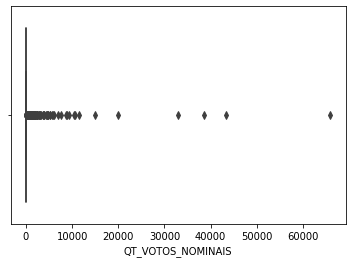

In [ ]:
sns.boxplot(x='QT_VOTOS_NOMINAIS', data=df_Cps_somadevotos_DeputadoFederal)

<AxesSubplot:xlabel='QT_VOTOS_NOMINAIS'>

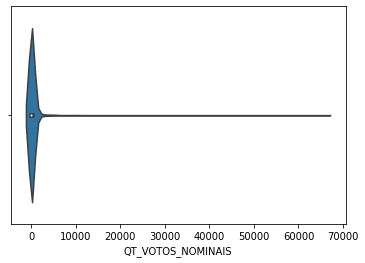

In [ ]:
sns.violinplot(x='QT_VOTOS_NOMINAIS', data=df_Cps_somadevotos_DeputadoFederal)

In [ ]:
df_Cps_somadevotos_DeputadoFederal.query('QT_VOTOS_NOMINAIS <= 100')

,QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO,
PROFESSOR CAMPANATTI,100
ADÉRMIS MARINI,100
NOILTON RAMOS,99
GUIGA PEIXOTO,98
MARCO BERTAIOLLI,98
...,...
TEKA ESTEVES,0
JAIRO MOTO PEÇAS,0
BUSCANDO O IMPONDERAVEL,0


<AxesSubplot:xlabel='QT_VOTOS_NOMINAIS'>

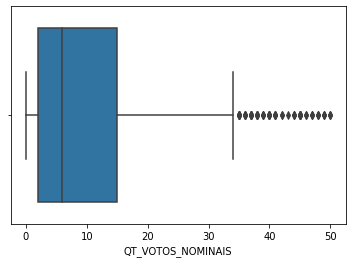

In [ ]:
sns.boxplot(x='QT_VOTOS_NOMINAIS', data=df_Cps_somadevotos_DeputadoFederal.query('QT_VOTOS_NOMINAIS <= 50'))

In [ ]:
df_Cps_somadevotos_DeputadoFederal.query('QT_VOTOS_NOMINAIS <= 500000').describe()

,QT_VOTOS_NOMINAIS
count,1483.000000
mean,337.585974
std,2653.446575
min,0.000000
25%,3.000000
50%,11.000000
75%,49.000000
max,65923.000000


### 2.14 Reindexando o dataset pré-processado

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7150000.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,1.0.0,Varies with device


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
8190,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8191,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
8192,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7150000.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,1.0.0,Varies with device


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8194 non-null   object        
 1   Category        8194 non-null   object        
 2   Rating          8194 non-null   float64       
 3   Reviews         8194 non-null   int64         
 4   Size            8194 non-null   float64       
 5   Installs        8194 non-null   int64         
 6   Type            8194 non-null   object        
 7   Price           8194 non-null   float64       
 8   Content Rating  8194 non-null   object        
 9   Genres          8194 non-null   object        
 10  Last Updated    8194 non-null   datetime64[ns]
 11  Current Ver     8194 non-null   object        
 12  Android Ver     8194 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 832.3+ KB


### 2.15 Salvando o dataset pré-processado

In [ ]:
df.to_csv('./datasets/googleplaystore_preprocessado.csv', index=False)

### 2.16 Outras possibilidades de Limpeza e Pré-Processamento

**(1)** <br/>
Poderíamos renomear os rótulos de todas as colunas para português e/ou remover todos os espaços. Para o último caso, poderíamos acessar uma coluna passando seu nome como atributo do DataFrame: <br/>

'Content Rating' ==> 'ContentRating' <br/>
`data.ContentRating`

**(2)** <br/>
Rodar algum algortimo de **similaridade de strings** que medisse a _similaridade_ entre os _nomes dos aplicativos_: https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings <br/>
Em caso de alta similaridade entre os nomes de registros, remova as duplicações.